# Лабораторная работа 4

## Общая информация

Дата выдачи: 17.05.2016

Срок сдачи: **24.05.2016 23:59 MSK **

### О задании
Цель лабораторной работы №4 - закрепить навыки работы с библиотекой sklearn, в частности с логическими методами классификации, методом главных компонент и метриками качества. Все задания выполняются в рамках задачи многоклассовой классификации цифр по их рукописному начертанию.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *Username_(group)_Lab4.ipynb*, где Username — ваша фамилия на латинице, group — название группы (например, Struminsky_IAD-20_Lab4.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма *[ИАД-NN] - Лабораторная работа 4 - Фамилия Имя Отчество*. Правильное указание темы письма позволит нам быстрее на него отреагировать!

# Визуализация данных

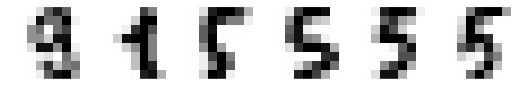

In [72]:
import sklearn.datasets
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
%matplotlib inline

digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target

fig, axes = plt.subplots(1, 6, figsize = (5, 5))
fig.set_figheight(1.5)
fig.set_figwidth(9)
for axis in axes:
    i = np.random.choice(X.shape[0])
    axis.set_axis_off()
    axis.imshow(1 - X[i].reshape(8, 8), cmap = 'gray', interpolation = 'None')

**Задача 1.1 (1 балл) ** Нормальзовать данные и воспользоваться методом главных компонент для снижения размерности данных до двух.

In [73]:
X_processed = (X - X.mean(axis = 1)[..., None]) / X.std(axis = 1)[..., None]
X2 = PCA(n_components = 2).fit(X_processed)
X2model = X2.transform(X_processed)

** Задача 1.2 (2 балла) ** Преобразованные данные можно изобразить на плоскости. Напишите код, который красит каждую точку плоскости в цвет, соответвующий исходной цифре. Какие цифры оказываются сконцентрированы в стороне? Какие цифры сильно накладываются друг на друга? Как это соотносится с их начертанием?

Убедитесь, что изображение будет достаточно большим, точки хорошо видны на графике и подписаны.

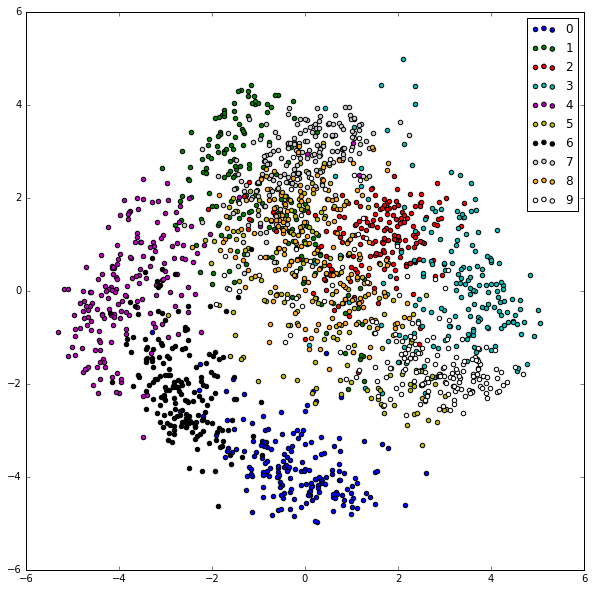

In [74]:
plt.figure(figsize = (10, 10))
colour = ['b','g','r','c','m','y','k','#cdcdcd','#ffa812','#ffffff']
for i in range(10):
    plt.scatter(X2.transform(X_processed[y == i])[:, 0], X2.transform(X_processed[y == i])[:, 1],c = colour[i],label=str(i));
plt.legend(loc = 1);

In [ ]:
#В стороне 0, 6, 4, также с другой стороны относительно обособленно 3.
#8 наложена на всю правую верхнюю часть, с трудом выделяется 5.
#0,6,4 по начертанию выглядят по-другому, а вот 8 и 5 довольно невнятны с точки зрения черт написания.

# Подбор параметров в логических методах

** Задача 2.1 (1 балл) ** Разделите выборку на тренировочную и проверочную, обучите на тренировочной выборке дерево принятия решений. Подберите параметры дерева *max_depth* и *max_features* с помощью класса [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [96]:
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_processed, y)

algorithm = GridSearchCV(DecisionTreeClassifier(),{'max_depth':range(5,16),'max_features':range(1,65)}).fit(X_train,y_train)

target_names = ['%d' % i for i in range(10)]
y_pred = algorithm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92        41
          1       0.74      0.82      0.78        39
          2       0.91      0.85      0.88        47
          3       0.82      0.86      0.84        58
          4       0.87      0.88      0.87        51
          5       0.73      0.87      0.79        46
          6       0.88      0.90      0.89        40
          7       0.94      0.81      0.87        42
          8       0.78      0.63      0.70        46
          9       0.81      0.75      0.78        40

avg / total       0.84      0.83      0.83       450



**Задача 2.2 (1 балл)** Выпишите явно подобранные параметры, score классификаторов на всей сетке параметров.

In [97]:
print(algorithm.best_params_,algorithm.best_score_)
algorithm.grid_scores_

({'max_features': 39, 'max_depth': 11}, 0.83296213808463249)


[mean: 0.39644, std: 0.06034, params: {'max_features': 1, 'max_depth': 5},
 mean: 0.54788, std: 0.02661, params: {'max_features': 2, 'max_depth': 5},
 mean: 0.54417, std: 0.03584, params: {'max_features': 3, 'max_depth': 5},
 mean: 0.55382, std: 0.00994, params: {'max_features': 4, 'max_depth': 5},
 mean: 0.56496, std: 0.01691, params: {'max_features': 5, 'max_depth': 5},
 mean: 0.62806, std: 0.01672, params: {'max_features': 6, 'max_depth': 5},
 mean: 0.62138, std: 0.07061, params: {'max_features': 7, 'max_depth': 5},
 mean: 0.55976, std: 0.05316, params: {'max_features': 8, 'max_depth': 5},
 mean: 0.63623, std: 0.02543, params: {'max_features': 9, 'max_depth': 5},
 mean: 0.67706, std: 0.02012, params: {'max_features': 10, 'max_depth': 5},
 mean: 0.60282, std: 0.03170, params: {'max_features': 11, 'max_depth': 5},
 mean: 0.66964, std: 0.04263, params: {'max_features': 12, 'max_depth': 5},
 mean: 0.65850, std: 0.03193, params: {'max_features': 13, 'max_depth': 5},
 mean: 0.63029, std: 

** Задача 2.3 (1 балл) ** Обучите на тренировочной выборке случайный лес. Подберите параметр леса *num_estimators* с помощью класса [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [80]:
from sklearn.ensemble import RandomForestClassifier
algorithm = GridSearchCV(RandomForestClassifier(),{'n_estimators':range(3,20)}).fit(X_train,y_train)

**Задача 2.4 (1 балл) ** Выведите отчет о классификации [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [81]:
target_names = ['%d' % i for i in range(10)]
y_pred = algorithm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(algorithm.best_params_,algorithm.best_score_)

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        36
          1       0.92      1.00      0.96        47
          2       0.96      0.96      0.96        48
          3       0.92      0.94      0.93        35
          4       1.00      0.93      0.96        41
          5       0.98      0.90      0.94        52
          6       1.00      0.98      0.99        48
          7       0.94      0.96      0.95        52
          8       0.95      0.95      0.95        40
          9       0.88      0.90      0.89        51

avg / total       0.95      0.95      0.95       450

({'n_estimators': 19}, 0.94135115070527098)


# Визуализация выхода алгоритма

**Задание 3.1 (2 балла) ** Для цифры с наименьшим f1-score из третьего задания построить визуализацию: нарисовать все точки тестовых данных, выделив выбранную цифру отдельным цветом.

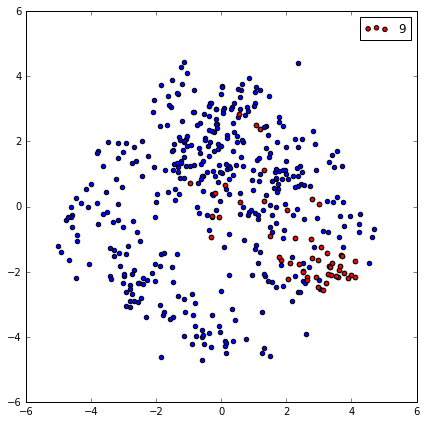

In [83]:
plt.figure(figsize=(7,7))
plt.scatter(X2.transform(X_test)[:,0],X2.transform(X_test)[:,1])
plt.scatter(X2.transform(X_test[y_test == 9])[:, 0], X2.transform(X_test[y_test == 9])[:, 1],c = 'r',label=str(9));
plt.legend(loc = 1);

** Задание 3.2 (1 балл) ** Обучить случайный лес отличать выбранную цифру от остальных. Построить ROC-кривую полученного классификатора, посчитать метрику ROC-AUC

In [92]:
y_train[y_train != 9] = 0
y_train[y_train == 9] = 1
y_test[y_test != 9] = 0
y_test[y_test == 9] = 1
algorithm1 = GridSearchCV(RandomForestClassifier(),{'n_estimators':range(3,20)}).fit(X_train,y_train)
target_names = ['%d' % i for i in range(2)]
y_pred = algorithm1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(algorithm1.best_params_,algorithm1.best_score_)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       405
          1       1.00      0.64      0.78        45

avg / total       0.97      0.96      0.96       450

({'n_estimators': 19}, 0.96288047512991837)


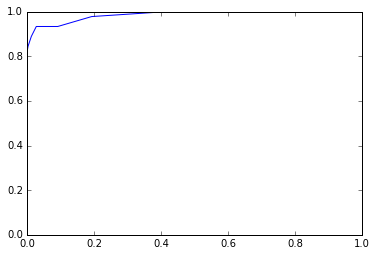

0.99


In [93]:
from sklearn import metrics

scores = algorithm1.predict_proba(X_test)[..., 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.show()

print('%.2f' % metrics.roc_auc_score(y_test, scores))